## Registration Id : SIRSS 1152
## Name : Abhishek Pandey
## College Name : Technocrats Institute of Technology(Excellence),Bhopal
## Subject : Exploratory data analysis

### Q.  What is Exploratory data analysis(EDA) ?

Exploratory data analysis (EDA) may be defined as process of examining or understanding the data and extracting insights or main characteristics of the data 

### Steps involved in EDA

#### -Examine the data distribution.
#### -Handling the missing values.
#### -Removing duplicate values.
#### -Encoding the categorical variables.
#### -Normalizing and scaing

### Step 1

In [2]:
# importing all the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=(12,6)
sns.set()


### Step 2
 We will load the data into Pandas data frame . for this analysis we are use "Heart failure clinical report dataset". 

In [3]:
heartdata = pd.read_csv("heart_failure_clinical_records_dataset.csv")

### Step 3
Observing the dataset using head() method

In [4]:
heartdata.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# observing the dimensions of data
heartdata.shape

(299, 13)

### Step 4 
Data preprocessing

In [6]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Our data is good since it has no missing values.

### Step 5 
Finding basic statistical characteristics of each column using Describe() method.

In [7]:
heartdata.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Step 6
This step involves hadling the missing values but our data do not have any missing value so we can proceed further.

### Step 7
we will check for duplicate values and if found any we will remove them as it affects the accuracy of our model.

In [8]:
duplicatevalues = heartdata.duplicated()
print(duplicatevalues.sum())
heartdata[duplicatevalues]

0


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


As we can observe that our dataset do not have any duplicate values ,so we can proceed further.

### Step 8
We will find the correlation between different coulmns o fthe data using corr() method.

<AxesSubplot:>

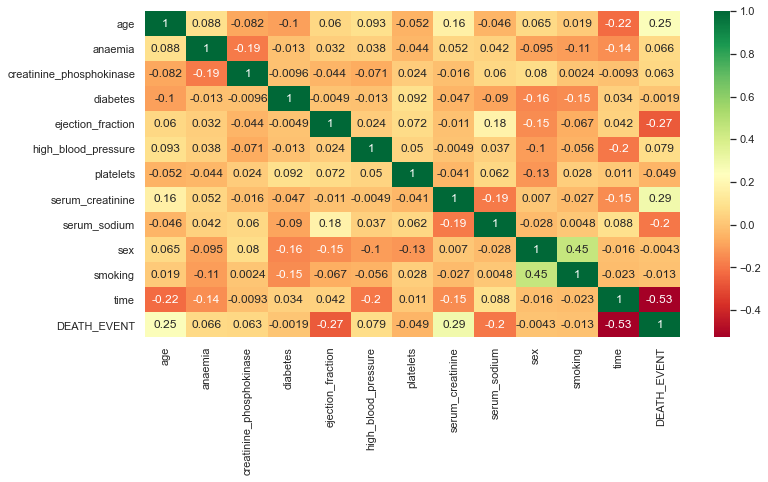

In [9]:
sns.heatmap(heartdata.corr(),annot=True,cmap='RdYlGn')


From the above graph we can observe that there is correlations between -

1.Age - Death event = 0.25

2.Serum_creatinine - Death event = 0.29

3.Smoking - Sex = 0.45

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

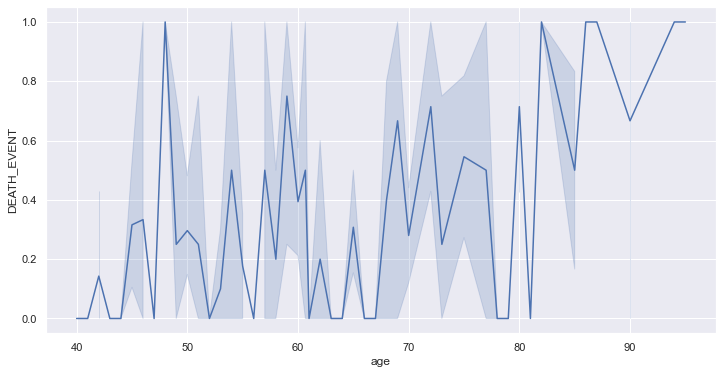

In [10]:
#VIsualizing the ralation between age and death event
sns.lineplot(x='age',y='DEATH_EVENT',data = heartdata)

<AxesSubplot:xlabel='serum_creatinine', ylabel='DEATH_EVENT'>

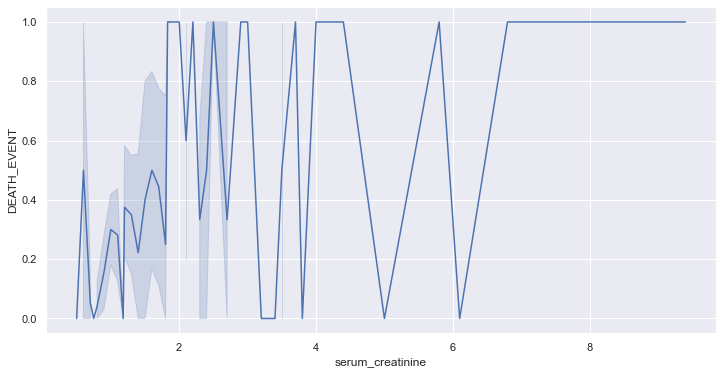

In [11]:
#visualizing ht realtion between serum_creatinine and Death event 
sns.lineplot(x='serum_creatinine',y='DEATH_EVENT',data=heartdata)

<AxesSubplot:xlabel='sex', ylabel='smoking'>

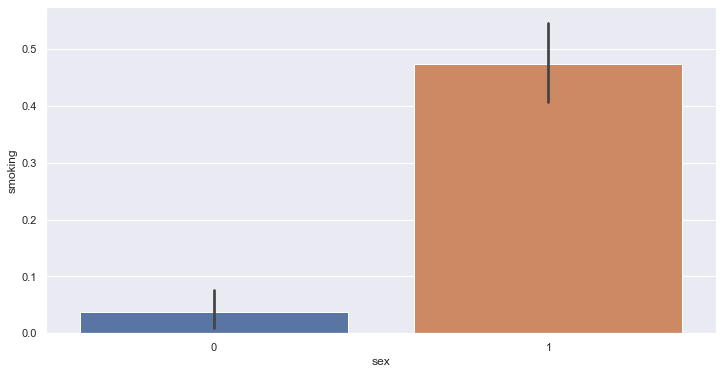

In [12]:
#visualizing the realtion between smoking and sex
#0 is for females and 1 is for males
sns.barplot(x='sex',y='smoking',data = heartdata)